# Importing dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib import cm

# Loading data

In [2]:
df = pd.read_csv('Employee.csv')

# Exploring the dataset

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


We may need to change the data type of some of the features. Those features with finite list of text values should be changed to category.

In [6]:
df['Education'] = df['Education'].astype('category')

In [7]:
df['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [8]:
df['City'] = df['City'].astype('category')

In [9]:
df['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

There are three payment tiers but we are not sure if the larger the number the better or if the smaller. We can categorise this feature as well.

In [10]:
df['PaymentTier'] = df['PaymentTier'].astype('category')

In [11]:
df['Gender'] = df['Gender'].astype('category')

In [12]:
df['EverBenched'].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

In [13]:
df['EverBenched'] = df['EverBenched'].astype('category')

In [14]:
df['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

In [15]:
df['LeaveOrNot'] = df['LeaveOrNot'].map({1:'Leave' ,0:'NotLeave' })

In [16]:
df['LeaveOrNot'] = df['LeaveOrNot'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  4653 non-null   category
 1   JoiningYear                4653 non-null   int64   
 2   City                       4653 non-null   category
 3   PaymentTier                4653 non-null   category
 4   Age                        4653 non-null   int64   
 5   Gender                     4653 non-null   category
 6   EverBenched                4653 non-null   category
 7   ExperienceInCurrentDomain  4653 non-null   int64   
 8   LeaveOrNot                 4653 non-null   category
dtypes: category(6), int64(3)
memory usage: 137.2 KB


# Train test split

In [18]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [19]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [20]:
df.shape, df_train.shape, df_val.shape, df_test.shape

((4653, 9), (2791, 9), (931, 9), (931, 9))

In [21]:
df = df_train

# Distribution of labels

In [22]:
df['LeaveOrNot'].value_counts(normalize = True)

NotLeave    0.646005
Leave       0.353995
Name: LeaveOrNot, dtype: float64

### Unbalancing is not a big issue.

# EDA of the features

## 1. Education

In [23]:
plt.rcParams['font.size'] = '16'

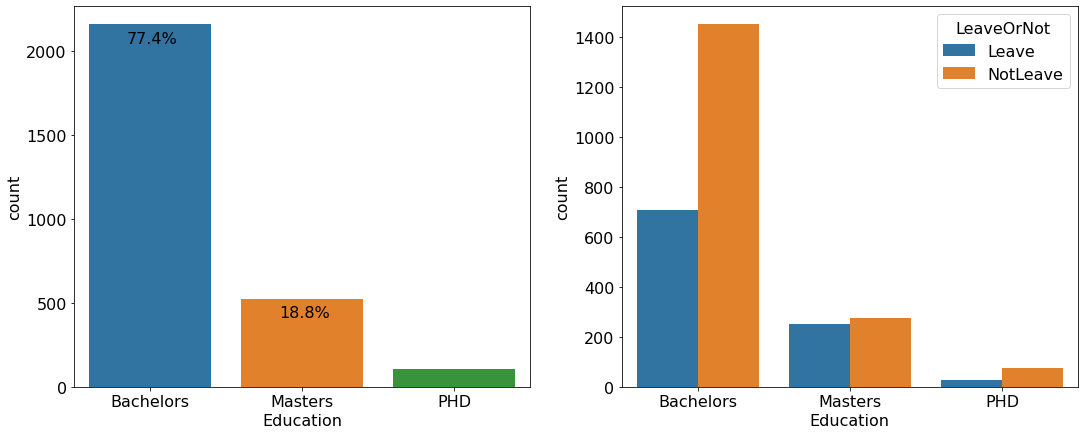

In [24]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

ax = sns.countplot(x = 'Education', data = df)
total = len(df['Education'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height() - 110
        x = p.get_x() + p.get_width()/2 - 0.15
        ax.annotate(percentage, (x, y))

plt.subplot(1,2,2)
sns.countplot(x = df['Education'], hue = df['LeaveOrNot'])

plt.show()


There is an association between the education level and leaving the company. The highest rate belongs to those with Masters degree.

## 2. Joining Year

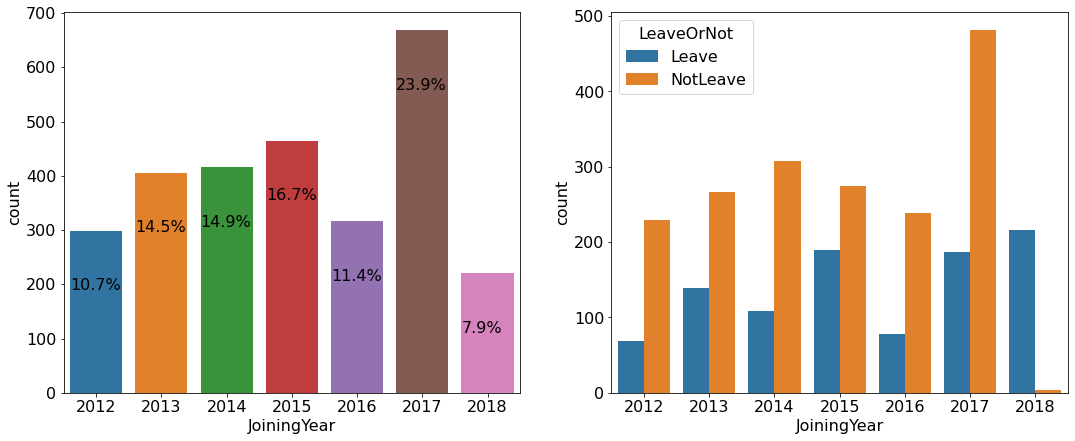

In [25]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

ax = sns.countplot(x = 'JoiningYear', data = df)
total = len(df['JoiningYear'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height() - 110
        x = p.get_x() + p.get_width()/2 - 0.4
        ax.annotate(percentage, (x, y))

plt.subplot(1,2,2)
sns.countplot(x = df['JoiningYear'], hue = df['LeaveOrNot'])

plt.show()

There is an association between the joining yeaer and leaving. For example, for 2018 the rate of leaving is much higher than other years.

## 3. City

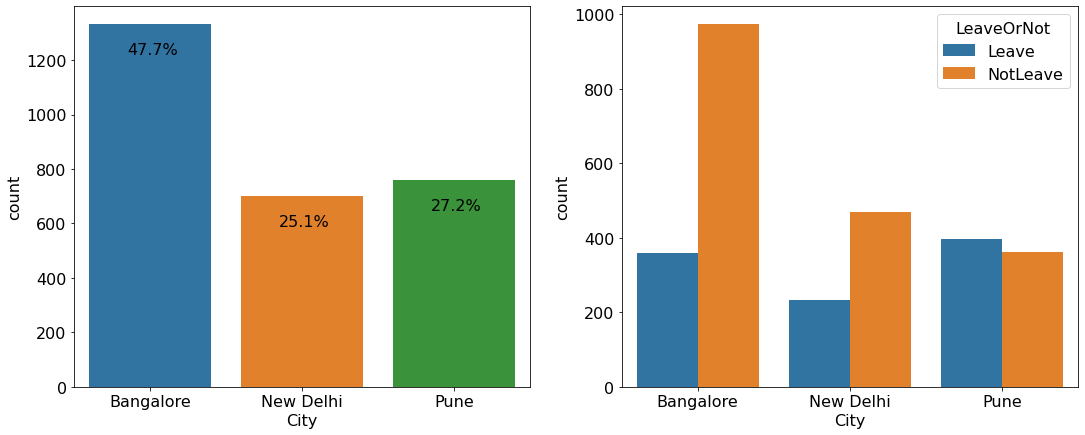

In [26]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

ax = sns.countplot(x = 'City', data = df)
total = len(df['City'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height() - 110
        x = p.get_x() + p.get_width()/2 - 0.15
        ax.annotate(percentage, (x, y))

plt.subplot(1,2,2)
sns.countplot(x = df['City'], hue = df['LeaveOrNot'])

plt.show()

There is an association between the city and leaving the company with Banglore having the highest rate.

## 4. Payment Tier

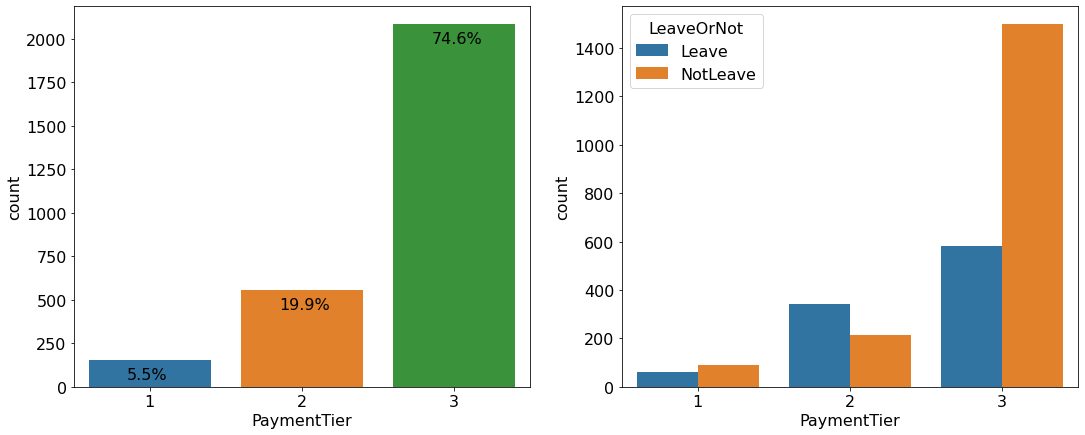

In [27]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

ax = sns.countplot(x = 'PaymentTier', data = df)
total = len(df['PaymentTier'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height() - 110
        x = p.get_x() + p.get_width()/2 - 0.15
        ax.annotate(percentage, (x, y))

plt.subplot(1,2,2)
sns.countplot(x = df['PaymentTier'], hue = df['LeaveOrNot'])

plt.show()

There is an association between the payment tier and leaving. Those at payment tier 2 are more likely to leave the company. Those at payment tier 3 are least likely to leave the company.

## 5. Age

`Age` is a numerical variable. the best way to study it is to use distributions and boxplots/violinplots.

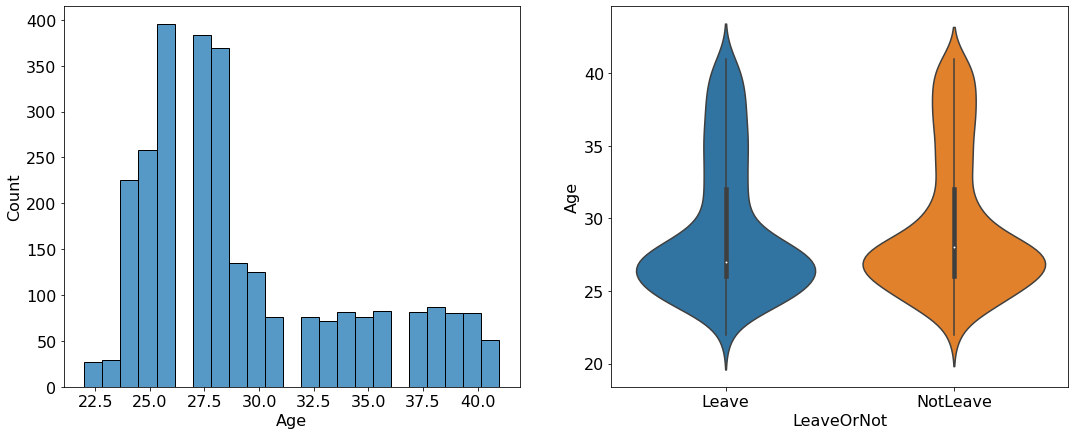

In [28]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

sns.histplot(x = 'Age', data = df)

plt.subplot(1,2,2)
sns.violinplot(x=df['LeaveOrNot'], y=df['Age'])

plt.show()

Distribution of `Age` is pretty similar for Leave and NotLeave groups. 

## 6. Gender

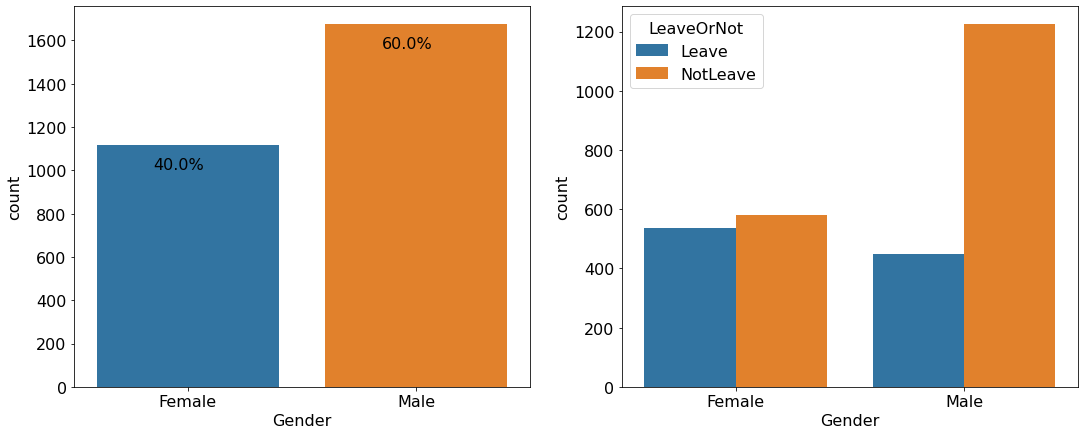

In [29]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

ax = sns.countplot(x = 'Gender', data = df)
total = len(df['Gender'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height() - 110
        x = p.get_x() + p.get_width()/2 - 0.15
        ax.annotate(percentage, (x, y))

plt.subplot(1,2,2)
sns.countplot(x = df['Gender'], hue = df['LeaveOrNot'])

plt.show()

Leaving is more common among females.

<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

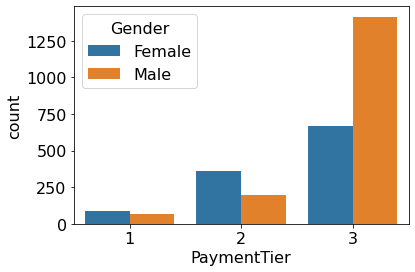

In [30]:
sns.countplot(x = df['PaymentTier'], hue = df['Gender'])

Payment Tier 2 is more common among females. Ealier we also observed that leaving was more common among those on Payment Tier 2. These two features are confounding.

## 7. EverBenched

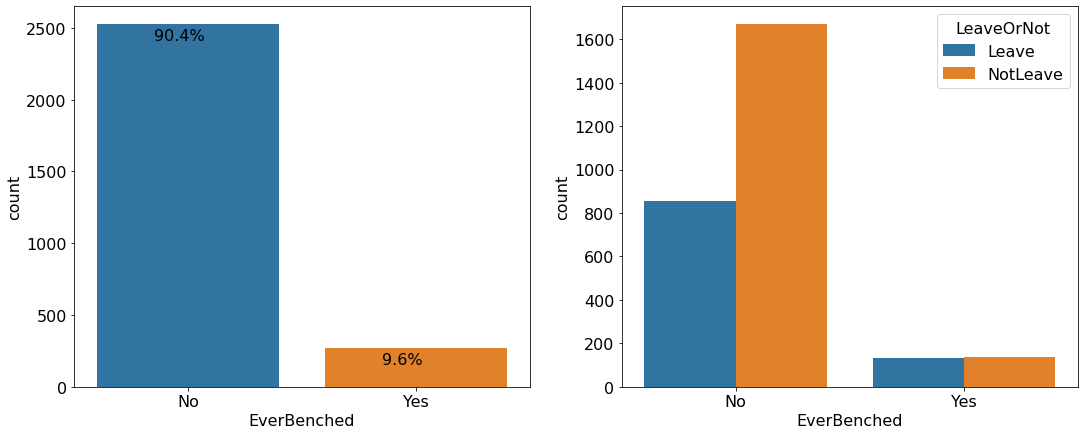

In [31]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

ax = sns.countplot(x = 'EverBenched', data = df)
total = len(df['EverBenched'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height() - 110
        x = p.get_x() + p.get_width()/2 - 0.15
        ax.annotate(percentage, (x, y))

plt.subplot(1,2,2)
sns.countplot(x = df['EverBenched'], hue = df['LeaveOrNot'])

plt.show()

Leaving is more common among those who are ever benched.

<AxesSubplot:xlabel='EverBenched', ylabel='count'>

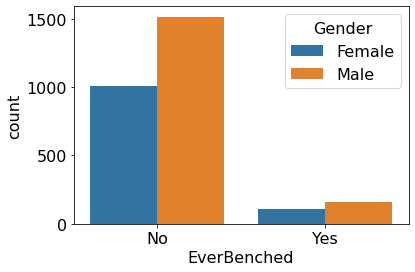

In [32]:
sns.countplot(x = df['EverBenched'], hue = df['Gender'])

## 8.ExperienceInCurrentDomain

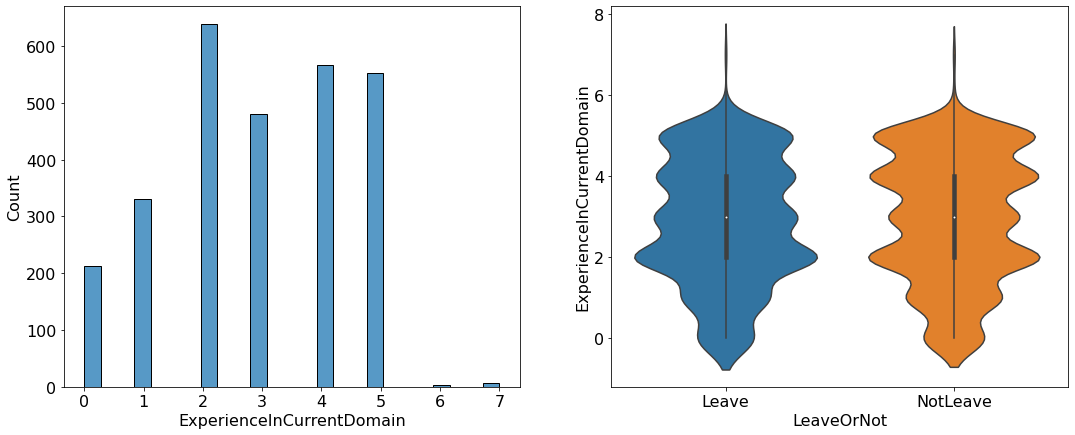

In [33]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

sns.histplot(x = 'ExperienceInCurrentDomain', data = df)

plt.subplot(1,2,2)
sns.violinplot(x=df['LeaveOrNot'], y=df['ExperienceInCurrentDomain'])

plt.show()

There are similarities betweeen those who leave and not leave considering the experience distribution. 

# Training the Model

In [34]:
df_train.LeaveOrNot = (df_train.LeaveOrNot == 'Leave').astype(int)

In [35]:
df_val.LeaveOrNot = (df_val.LeaveOrNot == 'Leave').astype(int)
df_test.LeaveOrNot = (df_test.LeaveOrNot == 'Leave').astype(int)

In [36]:
y_train = df_train['LeaveOrNot'].values
y_test = df_test['LeaveOrNot'].values
y_val = df_val['LeaveOrNot'].values

In [37]:
del df_train['LeaveOrNot']
del df_test['LeaveOrNot']
del df_val['LeaveOrNot']

In [38]:
from sklearn.feature_extraction import DictVectorizer

In [39]:
numerical = list(df._get_numeric_data().columns)
categorical = [x for x in list(df.columns) if x not in numerical]

In [40]:
dv = DictVectorizer(sparse = False)

In [41]:
train_dict = df_train[categorical+numerical].to_dict(orient = 'record')
X_train = dv.fit_transform(train_dict)

C:\Users\Ali\AppData\Local\Temp/ipykernel_18072/2676846334.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dict = df_train[categorical+numerical].to_dict(orient = 'record')


In [42]:
val_dict = df_val[categorical+numerical].to_dict(orient = 'record')
test_dict = df_test[categorical+numerical].to_dict(orient = 'record')
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

C:\Users\Ali\AppData\Local\Temp/ipykernel_18072/823765920.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  val_dict = df_val[categorical+numerical].to_dict(orient = 'record')
C:\Users\Ali\AppData\Local\Temp/ipykernel_18072/823765920.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  test_dict = df_test[categorical+numerical].to_dict(orient = 'record')


# Models

## 1. Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [44]:
dt = DecisionTreeClassifier()

In [45]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
from sklearn.metrics import roc_auc_score

In [47]:
y_pred = dt.predict_proba(X_val)[:, 1]
print("ROC-AUC for validation set is:" , roc_auc_score(y_val, y_pred))
y_pred = dt.predict_proba(X_train)[:, 1]
print("ROC-AUC for training set is:" , roc_auc_score(y_train, y_pred))

ROC-AUC for validation set is: 0.7921150128865979
ROC-AUC for training set is: 0.9846134759656084


It is natural that decision tree overfits the training dataset. In the following we will fine tune the decision tree model parameters.

### 1.1. Decision tree parameter tuning

In [48]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.611
   2 -> 0.726
   3 -> 0.779
   4 -> 0.804
   5 -> 0.836
   6 -> 0.851
  10 -> 0.810
  15 -> 0.789
  20 -> 0.786
None -> 0.792


In [49]:
scores = []

for depth in [4, 5, 6, 7, 8]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [50]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [51]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                            
max_depth             4      5      6      7      8
min_samples_leaf                                   
1                 0.804  0.834  0.851  0.851  0.836
5                 0.804  0.835  0.849  0.852  0.841
10                0.803  0.835  0.850  0.851  0.852
15                0.803  0.836  0.851  0.856  0.853
20                0.803  0.836  0.848  0.849  0.844
100               0.803  0.809  0.817  0.815  0.816
200               0.795  0.796  0.799  0.799  0.799
500               0.673  0.673  0.673  0.673  0.673

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

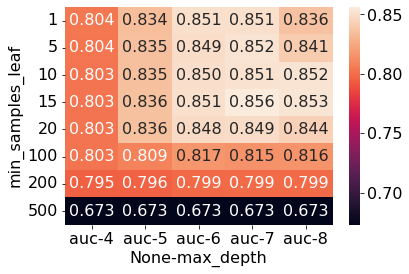

In [52]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

Best tree based on the search: max_depth=6, min_samples_leaf=15

In [63]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8511222079037801

## *Parameter tunning via randomized search and cross validation:*

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [85]:
param_dist = {
    'max_depth': randint(low = 1, high = 10), 
    'min_samples_leaf': randint(low = 1, high = 20)
}

dt = DecisionTreeClassifier(random_state=1)
rnd_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter = 200, cv = 6, scoring='roc_auc', random_state=40)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=1),
                   n_iter=200,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001689C7E61F0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001689725E130>},
                   random_state=40, scoring='roc_auc')

In [86]:
rnd_search.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=8, random_state=1)

Training the model with the tuned parameter out of random search:

In [88]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=8)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.852416237113402

## 2. Ensembles and random forest

## *Manual Parameter Tunning:*

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [103]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

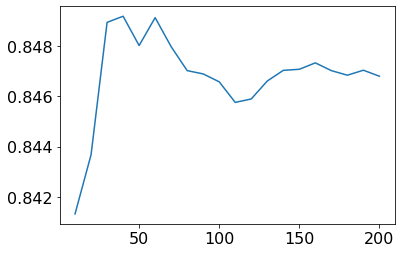

In [104]:
plt.plot(df_scores.n_estimators, df_scores.auc)

Let's do a grid search consideing max_depth and number of estimators as parameters:

In [105]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [106]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

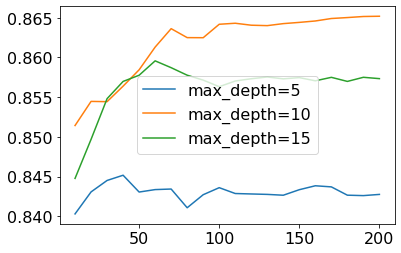

In [107]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

max_depth = 10 is showing the best performance. Let's continue the search by fixing the maximum depth and searching for optimum min_sample_leaf:

In [108]:
max_depth = 10

In [109]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [110]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

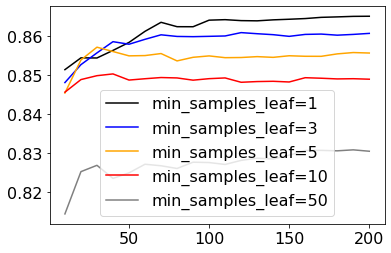

In [111]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [112]:
min_samples_leaf = 1

In [113]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)


0.8651793384879725

Now let's do a randomized search:

In [115]:
param_dist = {
    'n_estimators': randint(low=100, high=300),
    'max_features': randint(low=2, high=8),
    'max_depth': randint(low=5, high=15),
    'min_samples_leaf': randint(low=1, high=3)
}

rf = RandomForestClassifier(random_state=42)

rnd_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=100, cv = 5, scoring='roc_auc',
    random_state=42
)

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001689CEE5A00>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001689CED63D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001689D04FBB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001689D7AD640>},
                   random_state=42, scoring='roc_auc')

In [118]:
rnd_search.best_estimator_

RandomForestClassifier(max_depth=7, max_features=5, n_estimators=163,
                       random_state=42)

In [119]:
y_pred = rnd_search.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8623335481099657

## 3. Gradient boosting and XGBoost

In [120]:
import xgboost as xgb

In [121]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [321]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=30)

[00:42:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [322]:
y_pred = model.predict(dval)

In [323]:
roc_auc_score(y_val, y_pred)

0.862744308419244

In [324]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [325]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [326]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [327]:
df_score = parse_xgb_output(output)

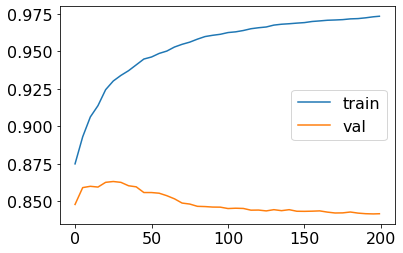

In [328]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

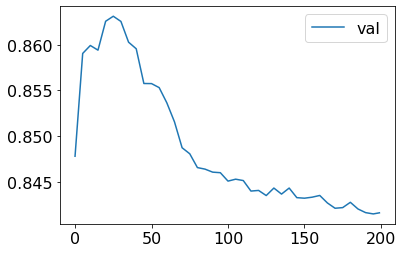

In [329]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

## 3.1. XGBoost parameter tuning

In [343]:
scores = {}

The next two cells should be run by assigning the following values to eta:
0.01, 0.02, 0.05, 0.1, 0.2, 0.4, 0.8, 1

In [358]:
%%capture output

xgb_params = {
    'eta': 0.8, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  verbose_eval=5,
                  evals=watchlist)

In [359]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.8'

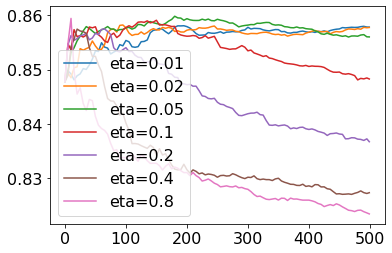

In [360]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

plt.legend()

An eta of 0.05 at num_boost_run of 200 gives the highest AUC.

In [361]:
scores = {}

Again, the following two cells should be repeated by changing the max_depth:
max_depth: 3, 4, 6, 8, 10

In [368]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  verbose_eval=5,
                  evals=watchlist)

In [370]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=8'

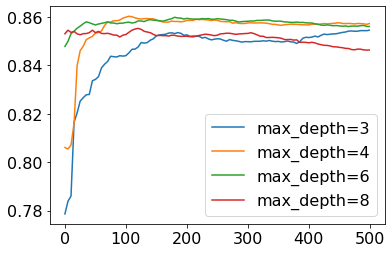

In [372]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.legend()

Max_depth of 4 is good. 

In [373]:
scores = {}

Same here, the following two cells should be repeated by changing the min_child_weight:
max_depth: 1, 10, 15, 30

In [383]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 4,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  verbose_eval=5,
                  evals=watchlist)

In [384]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

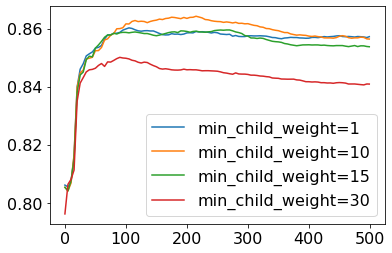

In [385]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.legend()

## *Final XGBoost Model:*

In [386]:
xgb_params = {
    'eta': 0.05, 
    'max_depth': 4,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [387]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8637806056701031

Now let's train the three models on the full train dataset and calculate the AUC score for the test dataset:

In [122]:
y_train_full = (df_train_full.LeaveOrNot == 'Leave').astype(int).values

In [123]:
del df_train_full['LeaveOrNot']

In [124]:
dicts_train_full = df_train_full.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_train_full)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [125]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=8)
dt.fit(X_full_train, y_train_full)
y_pred = dt.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.8823170420305398

In [126]:
# Random Forrest
rf = RandomForestClassifier(max_depth=7, max_features=5, n_estimators=163,
                       random_state=42)
rf.fit(X_full_train, y_train_full)
y_pred = rf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.8979086869924926

In [127]:
# XG Boost
dfulltrain = xgb.DMatrix(X_full_train, label=y_train_full,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())
xgb_params = {
    'eta': 0.05, 
    'max_depth': 4,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.895110055666207

We are going to use the random forrest model.